In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

In [3]:
print("Classes:", cancer.target_names)  # ['malignant' 'benign']
print("Dataset shape:", X.shape)

Classes: ['malignant' 'benign']
Dataset shape: (569, 30)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=5000)

In [9]:
y_pred = model.predict(X_test_scaled)

In [10]:
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



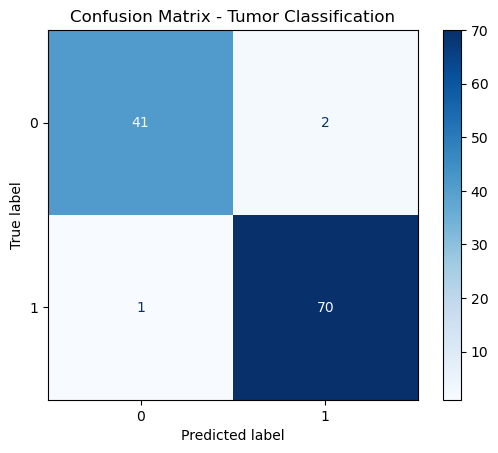

In [11]:
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap="Blues")
plt.title("Confusion Matrix - Tumor Classification")
plt.show()


In [12]:
coefficients = model.coef_[0]
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Coefficient": coefficients})
importance_df = importance_df.sort_values(by="Coefficient", ascending=False)


C:\Users\Jeyanthan GJ\AppData\Local\Temp\ipykernel_4912\3989798654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=importance_df.head(15), palette="viridis")


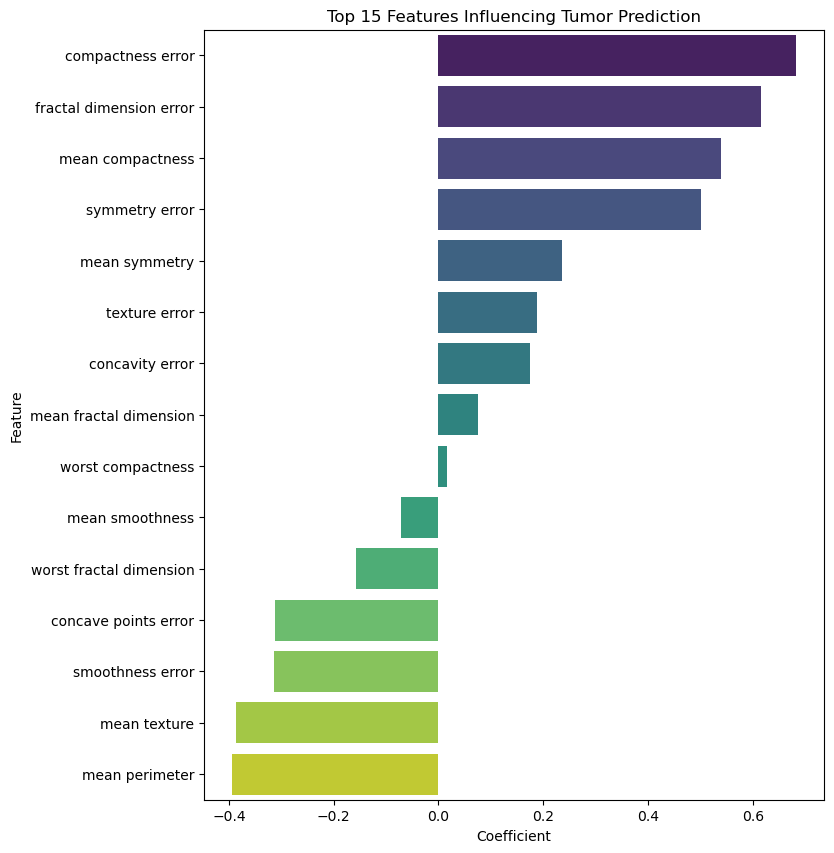

In [13]:
plt.figure(figsize=(8,10))
sns.barplot(x="Coefficient", y="Feature", data=importance_df.head(15), palette="viridis")
plt.title("Top 15 Features Influencing Tumor Prediction")
plt.show()